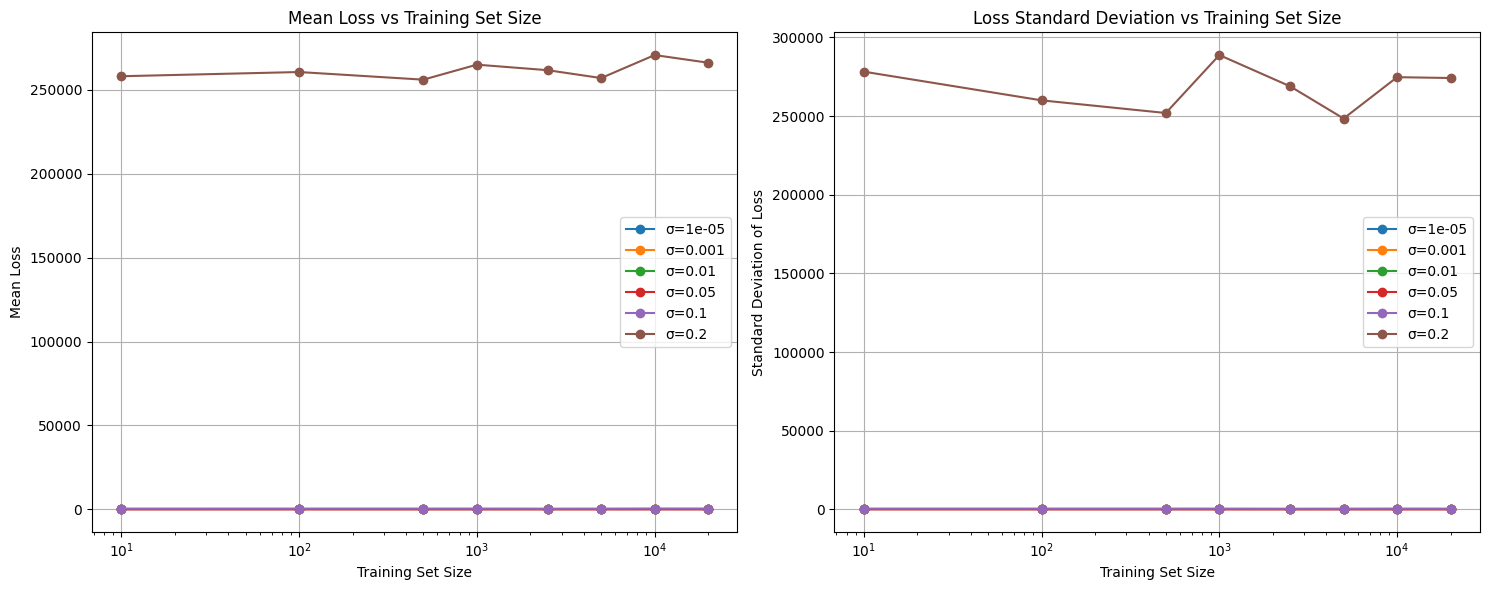


Numerical Values:

n_train  sigma  mean_loss  std_loss
----------------------------------------
     10  0.00001  0.000000  0.000000
     10  0.00100  0.000680  0.000499
     10  0.01000  0.142793  0.082402
     10  0.05000  6.405633  5.612840
     10  0.10000  437.471807  456.774269
     10  0.20000  258119.152875  278265.558120
    100  0.00001  0.000001  0.000000
    100  0.00100  0.000486  0.000278
    100  0.01000  0.138763  0.051861
    100  0.05000  6.062604  3.548288
    100  0.10000  445.640480  456.584824
    100  0.20000  260627.375941  260025.903973
    500  0.00001  0.000004  0.000000
    500  0.00100  0.000331  0.000168
    500  0.01000  0.100032  0.031945
    500  0.05000  5.727855  3.238643
    500  0.10000  445.025057  461.261173
    500  0.20000  256077.295750  251979.475730
   1000  0.00001  0.000018  0.000000
   1000  0.00100  0.000384  0.000145
   1000  0.01000  0.079695  0.024231
   1000  0.05000  5.209691  3.159582
   1000  0.10000  456.743958  452.221868
   100

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

# Load the results
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_false_h1000_d4_g1/stability_results_final_20250129_005333.json', 'r') as f:
    results = json.load(f)

# Process results to get means and stds for each n_train and sigma
processed_data = {}

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        processed_data[n_train] = {}
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]:
            processed_data[n_train][sigma] = {
                'mean': np.mean(losses),
                'std': np.std(losses)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
sigma_values = sorted(list(processed_data[n_trains[0]].keys()), key=float)

# Create figure with two subplots: one for means and one for stds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
for sigma in sigma_values:
    means = [processed_data[n][sigma]['mean'] for n in n_trains]
    ax1.semilogx(n_trains, means, 'o-', label=f'σ={sigma}')

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Loss')
ax1.set_title('Mean Loss vs Training Set Size')
ax1.legend()
ax1.grid(True)

# Plot standard deviations
for sigma in sigma_values:
    stds = [processed_data[n][sigma]['std'] for n in n_trains]
    ax2.semilogx(n_trains, stds, 'o-', label=f'σ={sigma}')

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Standard Deviation of Loss')
ax2.set_title('Loss Standard Deviation vs Training Set Size')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print numerical values
print("\nNumerical Values:")
print("\nn_train  sigma  mean_loss  std_loss")
print("-" * 40)
for n in n_trains:
    for sigma in sigma_values:
        mean = processed_data[n][sigma]['mean']
        std = processed_data[n][sigma]['std']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}")

Available sigmas: ['1e-05', '0.001', '0.01', '0.05', '0.1', '0.2']


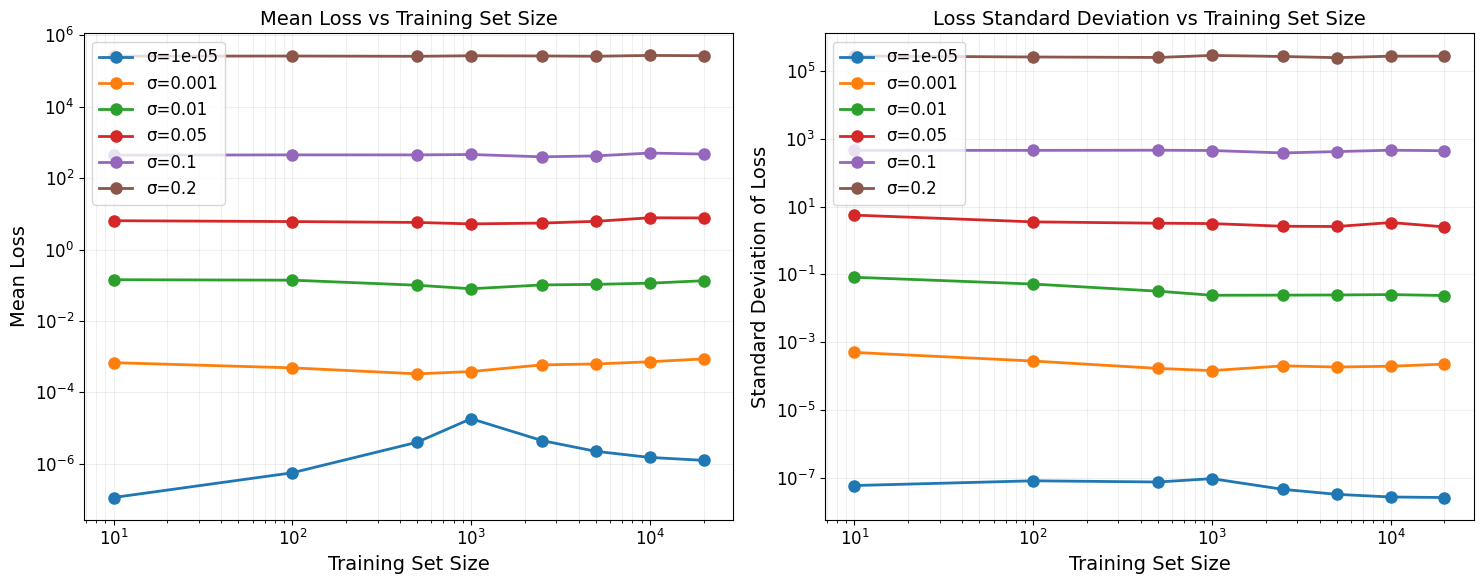


Numerical Values:

n_train  sigma  mean_loss  std_loss
----------------------------------------
     10  0.00001  0.000000  0.000000
     10  0.00100  0.000680  0.000499
     10  0.01000  0.142793  0.082402
     10  0.05000  6.405633  5.612840
     10  0.10000  437.471807  456.774269
     10  0.20000  258119.152875  278265.558120
    100  0.00001  0.000001  0.000000
    100  0.00100  0.000486  0.000278
    100  0.01000  0.138763  0.051861
    100  0.05000  6.062604  3.548288
    100  0.10000  445.640480  456.584824
    100  0.20000  260627.375941  260025.903973
    500  0.00001  0.000004  0.000000
    500  0.00100  0.000331  0.000168
    500  0.01000  0.100032  0.031945
    500  0.05000  5.727855  3.238643
    500  0.10000  445.025057  461.261173
    500  0.20000  256077.295750  251979.475730
   1000  0.00001  0.000018  0.000000
   1000  0.00100  0.000384  0.000145
   1000  0.01000  0.079695  0.024231
   1000  0.05000  5.209691  3.159582
   1000  0.10000  456.743958  452.221868
   100

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

# Load the results
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_false_h1000_d4_g1/stability_results_final_20250129_005333.json', 'r') as f:
    results = json.load(f)

# Process results to get means and stds for each n_train and sigma
processed_data = {}

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        processed_data[n_train] = {}
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]:
            processed_data[n_train][sigma] = {
                'mean': np.mean(losses),
                'std': np.std(losses)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas = ['1e-05', '0.001', '0.01', '0.05', '0.1', '0.2'] # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
for sigma in selected_sigmas:
    means = [processed_data[n][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Loss')
ax1.set_title('Mean Loss vs Training Set Size')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations
for sigma in selected_sigmas:
    stds = [processed_data[n][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Standard Deviation of Loss')
ax2.set_title('Loss Standard Deviation vs Training Set Size')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_loss  std_loss")
print("-" * 40)
for n in sorted(n_trains):  # Make sure n_trains are sorted for printing
    for sigma in selected_sigmas:
        mean = processed_data[n][sigma]['mean']
        std = processed_data[n][sigma]['std']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}")

Available sigmas: ['1e-05', '0.001', '0.01', '0.05', '0.1', '0.2']


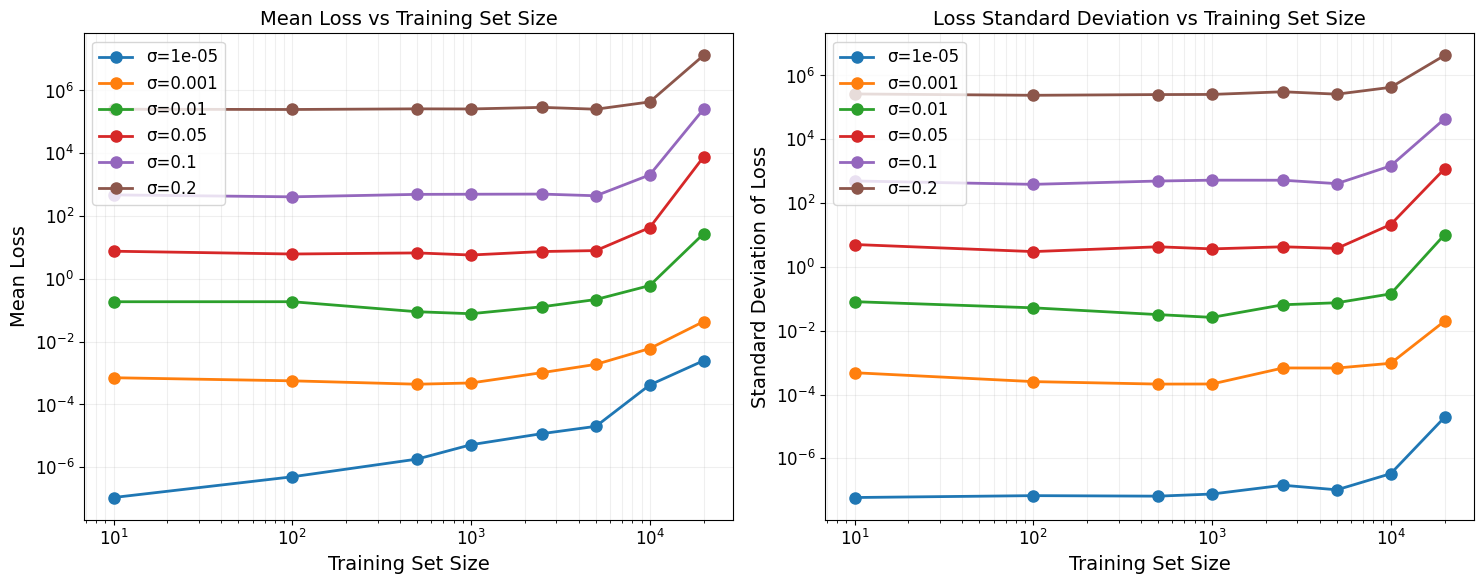


Numerical Values:

n_train  sigma  mean_loss  std_loss
----------------------------------------
     10  0.00001  0.000000  0.000000
     10  0.00100  0.000711  0.000485
     10  0.01000  0.186991  0.081686
     10  0.05000  7.600082  5.053821
     10  0.10000  472.259565  495.106017
     10  0.20000  252754.406549  263877.339571
    100  0.00001  0.000000  0.000000
    100  0.00100  0.000567  0.000255
    100  0.01000  0.187483  0.052388
    100  0.05000  6.192817  3.030204
    100  0.10000  410.030523  387.859858
    100  0.20000  247853.534164  239594.798492
    500  0.00001  0.000002  0.000000
    500  0.00100  0.000442  0.000213
    500  0.01000  0.089858  0.032109
    500  0.05000  6.708894  4.287619
    500  0.10000  491.145497  493.196200
    500  0.20000  259660.130352  252357.698455
   1000  0.00001  0.000005  0.000000
   1000  0.00100  0.000484  0.000215
   1000  0.01000  0.077723  0.026305
   1000  0.05000  5.753590  3.682228
   1000  0.10000  496.000549  524.340237
   100

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

# Load the results
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_true_h1000_d4_g1/stability_results_final_20250129_005818.json', 'r') as f:
    results = json.load(f)

# Process results to get means and stds for each n_train and sigma
processed_data = {}

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        processed_data[n_train] = {}
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]:
            processed_data[n_train][sigma] = {
                'mean': np.mean(losses),
                'std': np.std(losses)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas = ['1e-05', '0.001', '0.01', '0.05', '0.1', '0.2'] # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
for sigma in selected_sigmas:
    means = [processed_data[n][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Loss')
ax1.set_title('Mean Loss vs Training Set Size')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations
for sigma in selected_sigmas:
    stds = [processed_data[n][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Standard Deviation of Loss')
ax2.set_title('Loss Standard Deviation vs Training Set Size')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_loss  std_loss")
print("-" * 40)
for n in sorted(n_trains):  # Make sure n_trains are sorted for printing
    for sigma in selected_sigmas:
        mean = processed_data[n][sigma]['mean']
        std = processed_data[n][sigma]['std']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}")

Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']


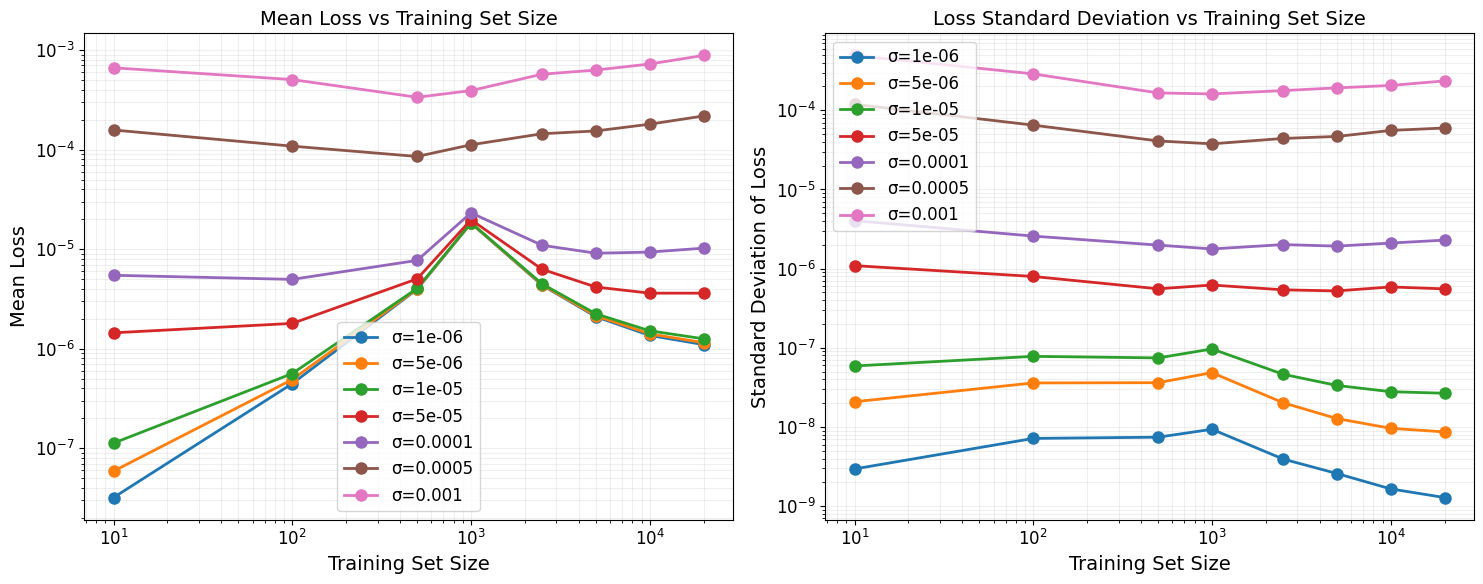


Numerical Values:

n_train  sigma  mean_loss  std_loss
----------------------------------------
     10  0.00000  0.000000  0.000000
     10  0.00001  0.000000  0.000000
     10  0.00001  0.000000  0.000000
     10  0.00005  0.000001  0.000001
     10  0.00010  0.000005  0.000004
     10  0.00050  0.000157  0.000119
     10  0.00100  0.000663  0.000493
    100  0.00000  0.000000  0.000000
    100  0.00001  0.000000  0.000000
    100  0.00001  0.000001  0.000000
    100  0.00005  0.000002  0.000001
    100  0.00010  0.000005  0.000003
    100  0.00050  0.000108  0.000065
    100  0.00100  0.000505  0.000288
    500  0.00000  0.000004  0.000000
    500  0.00001  0.000004  0.000000
    500  0.00001  0.000004  0.000000
    500  0.00005  0.000005  0.000001
    500  0.00010  0.000008  0.000002
    500  0.00050  0.000085  0.000041
    500  0.00100  0.000335  0.000166
   1000  0.00000  0.000018  0.000000
   1000  0.00001  0.000018  0.000000
   1000  0.00001  0.000018  0.000000
   1000  0.0000

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

# Load the results
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_false_h1000_d4_g1_small/stability_results_final_20250129_011625.json', 'r') as f:
    results = json.load(f)

# Process results to get means and stds for each n_train and sigma
processed_data = {}

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        processed_data[n_train] = {}
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]:
            processed_data[n_train][sigma] = {
                'mean': np.mean(losses),
                'std': np.std(losses)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas =  ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001'] # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
for sigma in selected_sigmas:
    means = [processed_data[n][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Loss')
ax1.set_title('Mean Loss vs Training Set Size')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations
for sigma in selected_sigmas:
    stds = [processed_data[n][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Standard Deviation of Loss')
ax2.set_title('Loss Standard Deviation vs Training Set Size')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_loss  std_loss")
print("-" * 40)
for n in sorted(n_trains):  # Make sure n_trains are sorted for printing
    for sigma in selected_sigmas:
        mean = processed_data[n][sigma]['mean']
        std = processed_data[n][sigma]['std']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}")

Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']


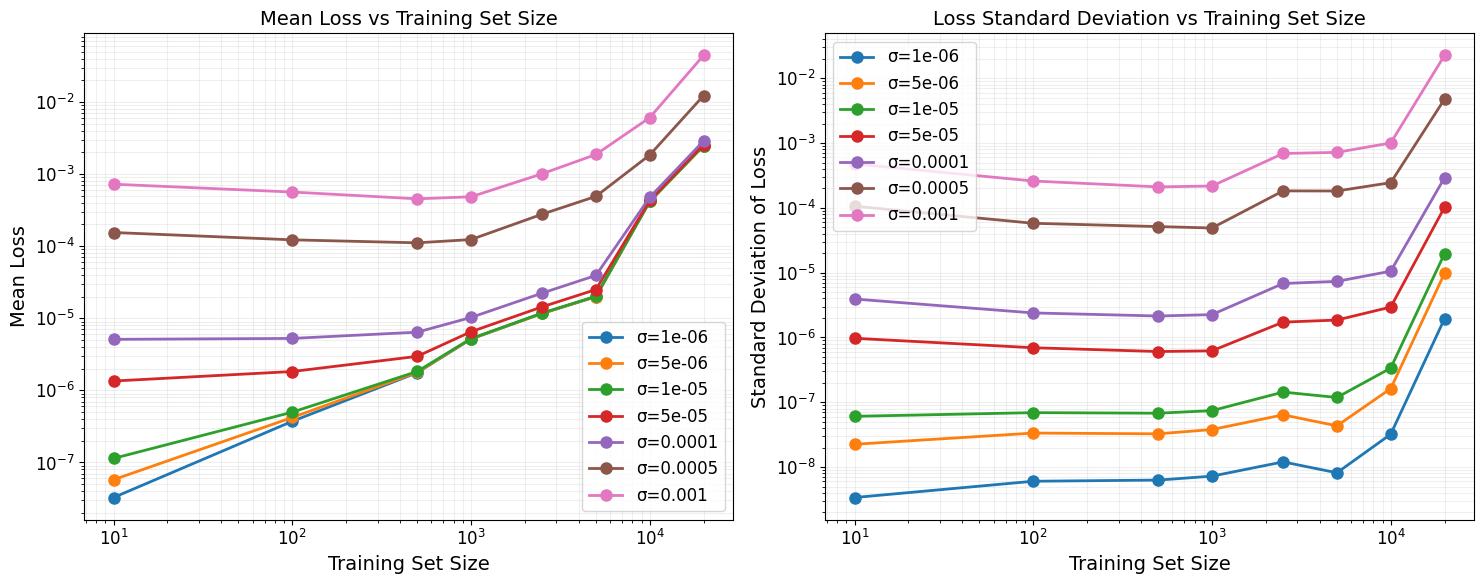


Numerical Values:

n_train  sigma  mean_loss  std_loss
----------------------------------------
     10  0.00000  0.000000  0.000000
     10  0.00001  0.000000  0.000000
     10  0.00001  0.000000  0.000000
     10  0.00005  0.000001  0.000001
     10  0.00010  0.000005  0.000004
     10  0.00050  0.000155  0.000106
     10  0.00100  0.000724  0.000476
    100  0.00000  0.000000  0.000000
    100  0.00001  0.000000  0.000000
    100  0.00001  0.000000  0.000000
    100  0.00005  0.000002  0.000001
    100  0.00010  0.000005  0.000002
    100  0.00050  0.000122  0.000058
    100  0.00100  0.000563  0.000260
    500  0.00000  0.000002  0.000000
    500  0.00001  0.000002  0.000000
    500  0.00001  0.000002  0.000000
    500  0.00005  0.000003  0.000001
    500  0.00010  0.000006  0.000002
    500  0.00050  0.000111  0.000051
    500  0.00100  0.000454  0.000211
   1000  0.00000  0.000005  0.000000
   1000  0.00001  0.000005  0.000000
   1000  0.00001  0.000005  0.000000
   1000  0.0000

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

# Load the results
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_true_h1000_d4_g1_small/stability_results_final_20250129_011054.json', 'r') as f:
    results = json.load(f)

# Process results to get means and stds for each n_train and sigma
processed_data = {}

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        processed_data[n_train] = {}
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]:
            processed_data[n_train][sigma] = {
                'mean': np.mean(losses),
                'std': np.std(losses)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas =  ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001'] # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
for sigma in selected_sigmas:
    means = [processed_data[n][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Loss')
ax1.set_title('Mean Loss vs Training Set Size')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations
for sigma in selected_sigmas:
    stds = [processed_data[n][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Standard Deviation of Loss')
ax2.set_title('Loss Standard Deviation vs Training Set Size')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_loss  std_loss")
print("-" * 40)
for n in sorted(n_trains):  # Make sure n_trains are sorted for printing
    for sigma in selected_sigmas:
        mean = processed_data[n][sigma]['mean']
        std = processed_data[n][sigma]['std']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}")

Computing base loss for n_train=10
Computing base loss for n_train=100


/tmp/ipykernel_1033194/795794712.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(data_path, map_location=device)


Computing base loss for n_train=500
Computing base loss for n_train=1000
Computing base loss for n_train=2500
Computing base loss for n_train=5000
Computing base loss for n_train=10000
Computing base loss for n_train=20000
Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']


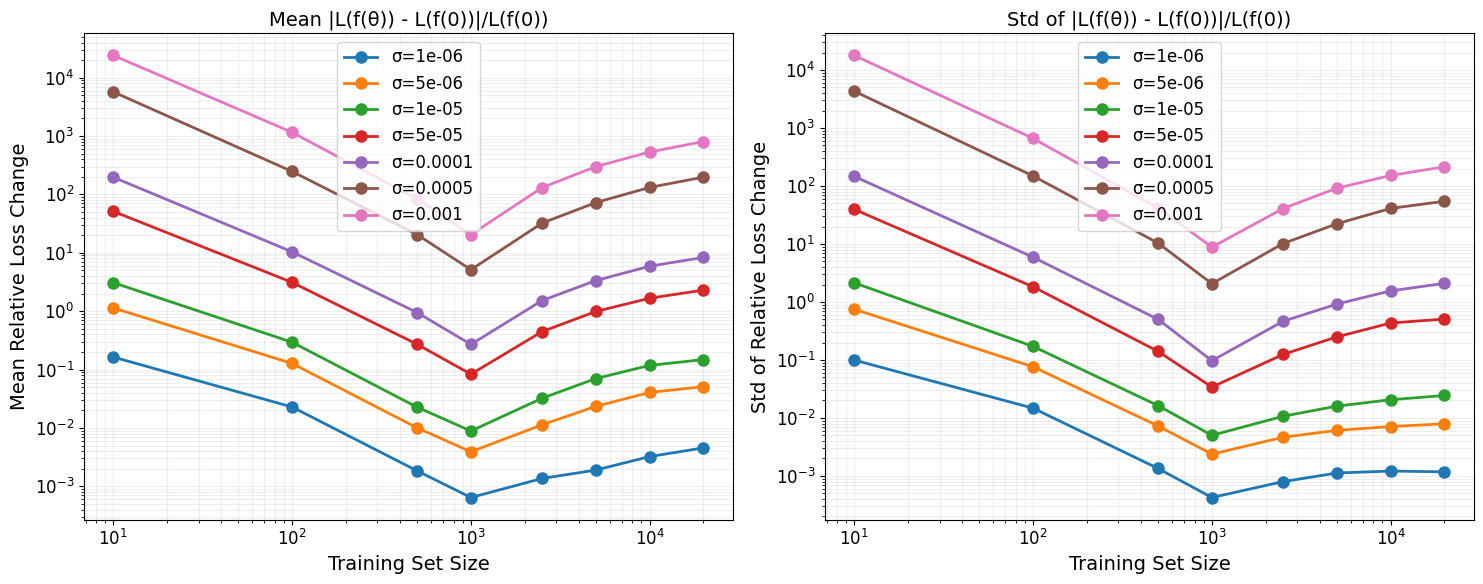


Numerical Values:

n_train  sigma  mean_rel_change  std_rel_change  base_loss
-----------------------------------------------------------------
     10  0.00000  0.163861  0.099505  0.000000
     10  0.00001  1.136800  0.748187  0.000000
     10  0.00001  3.081310  2.134471  0.000000
     10  0.00005  51.317149  39.537013  0.000000
     10  0.00010  196.953406  146.336875  0.000000
     10  0.00050  5699.111419  4309.529668  0.000000
     10  0.00100  24032.340717  17853.691536  0.000000
    100  0.00000  0.022857  0.014720  0.000000
    100  0.00001  0.127344  0.076218  0.000000
    100  0.00001  0.293884  0.171254  0.000000
    100  0.00005  3.114132  1.825593  0.000000
    100  0.00010  10.390445  5.905472  0.000000
    100  0.00050  247.203913  148.832676  0.000000
    100  0.00100  1156.644437  660.588743  0.000000
    500  0.00000  0.001847  0.001344  0.000004
    500  0.00001  0.010065  0.007264  0.000004
    500  0.00001  0.022730  0.016307  0.000004
    500  0.00005  0.271442

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
from typing import Dict, List
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from typing import List, Set, Tuple
import random

class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int, depth: int, mode: str = 'special', gamma: float = 1.0):
        super().__init__()
        self.gamma = gamma
        # ... rest of initialization code stays the same ...

        
        torch.set_default_dtype(torch.float32)
        
        self.mode = mode
        self.depth = depth
        self.hidden_size = hidden_size
        self.input_dim = d
        
        layers = []
        prev_dim = d
        self.layer_lrs = []  # Store layerwise learning rates
        
        for layer_idx in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            
            if mode == 'special':
                # Special initialization as in original code
                gain = nn.init.calculate_gain('relu')
                std = gain / np.sqrt(prev_dim)
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
                
            elif mode == 'spectral':
                # Implement spectral initialization
                fan_in = prev_dim
                fan_out = hidden_size
                std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(float(fan_out) / fan_in)
                
            elif mode == 'mup_pennington':
                # muP initialization and learning rates from the paper
                if layer_idx == 0:  # Embedding layer
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0  # O(1) learning rate for embedding
                else:  # Hidden layers
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for hidden
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(lr_scale)
                
            else:  # standard
                nn.init.xavier_uniform_(linear.weight)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
            
            layers.extend([
                linear,
                nn.ReLU()
            ])
            prev_dim = hidden_size
        
        # Final layer
        final_layer = nn.Linear(prev_dim, 1)
        if mode == 'special':
            nn.init.normal_(final_layer.weight, std=0.01)
            self.layer_lrs.append(1.0)
        elif mode == 'spectral':
            fan_in = prev_dim
            fan_out = 1
            std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(float(fan_out) / fan_in)
        elif mode == 'mup_pennington':
            std = 1.0 / np.sqrt(prev_dim)
            lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for readout
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(lr_scale)
        else:
            nn.init.xavier_uniform_(final_layer.weight)
            self.layer_lrs.append(1.0)
            
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gamma = float(self.gamma)  # Ensure gamma is a float
        return self.network(x).squeeze() / gamma
    
    def get_layer_learning_rates(self, base_lr: float) -> List[float]:
        """Return list of learning rates for each layer"""
        return [base_lr * lr for lr in self.layer_lrs]

def extract_n_train(path: str) -> int:
    """Extract n_train from path"""
    match = re.search(r'_n(\d+)_', path)
    if match:
        return int(match.group(1))
    raise ValueError(f"Could not extract n_train from path: {path}")

def load_model_and_evaluate(model_path: str, data_path: str, hidden_size: int, depth: int) -> float:
    """Load original model and calculate its loss on training data"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Load model
    state_dict = torch.load(model_path, map_location=device, weights_only=True)
    model = DeepNN(d=30, hidden_size=hidden_size, depth=depth, mode='mup_pennington').to(device)
    model.load_state_dict(state_dict)
    
    # Load data
    data_dict = torch.load(data_path, map_location=device)
    X = data_dict['X'].to(device)
    y = data_dict['y'].to(device)
    
    # Calculate loss
    with torch.no_grad():
        pred = model(X)
        loss = torch.mean((pred - y) ** 2).item()
    
    return loss

# Model and data paths
model_paths = [
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n10_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n100_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n500_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n1000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n2500_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n5000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n10000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n20000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt"
]

data_paths = [
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n10_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n100_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n500_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n1000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n2500_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n5000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n10000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt",
    "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_false_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n20000_lr0.005_g1.0_mup_pennington_20250125_153135_rank0.pt"
]

# Load the results with perturbations
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_false_h1000_d4_g1_small/stability_results_final_20250129_011625.json', 'r') as f:
    results = json.load(f)

# Process results with true base loss
processed_data = {}

# Create path mapping
path_mapping = {}
for model_path, data_path in zip(model_paths, data_paths):
    n_train = extract_n_train(model_path)
    path_mapping[n_train] = (model_path, data_path)

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        # Get base loss from original model
        model_path, data_path = path_mapping[n_train]
        print(f"Computing base loss for n_train={n_train}")
        base_loss = load_model_and_evaluate(model_path, data_path, hidden_size=1000, depth=4)
        processed_data[n_train] = {
            'base_loss': base_loss,
            'perturbations': {}
        }
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]['perturbations']:
            # Calculate relative changes using true base loss
            base_loss = processed_data[n_train]['base_loss']
            relative_changes = [abs(loss - base_loss)/base_loss for loss in losses]
            processed_data[n_train]['perturbations'][sigma] = {
                'mean': np.mean(relative_changes),
                'std': np.std(relative_changes)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]]['perturbations'].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas = ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']  # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means of relative changes
for sigma in selected_sigmas:
    means = [processed_data[n]['perturbations'][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Relative Loss Change')
ax1.set_title('Mean |L(f(θ)) - L(f(0))|/L(f(0))')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations of relative changes
for sigma in selected_sigmas:
    stds = [processed_data[n]['perturbations'][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Std of Relative Loss Change')
ax2.set_title('Std of |L(f(θ)) - L(f(0))|/L(f(0))')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_rel_change  std_rel_change  base_loss")
print("-" * 65)
for n in sorted(n_trains):
    for sigma in selected_sigmas:
        mean = processed_data[n]['perturbations'][sigma]['mean']
        std = processed_data[n]['perturbations'][sigma]['std']
        base = processed_data[n]['base_loss']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}  {base:.6f}")

Computing base loss for n_train=10


/tmp/ipykernel_1033194/411436125.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(data_path, map_location=device)


Computing base loss for n_train=100
Computing base loss for n_train=500
Computing base loss for n_train=1000
Computing base loss for n_train=2500
Computing base loss for n_train=5000
Computing base loss for n_train=10000
Computing base loss for n_train=20000
Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']


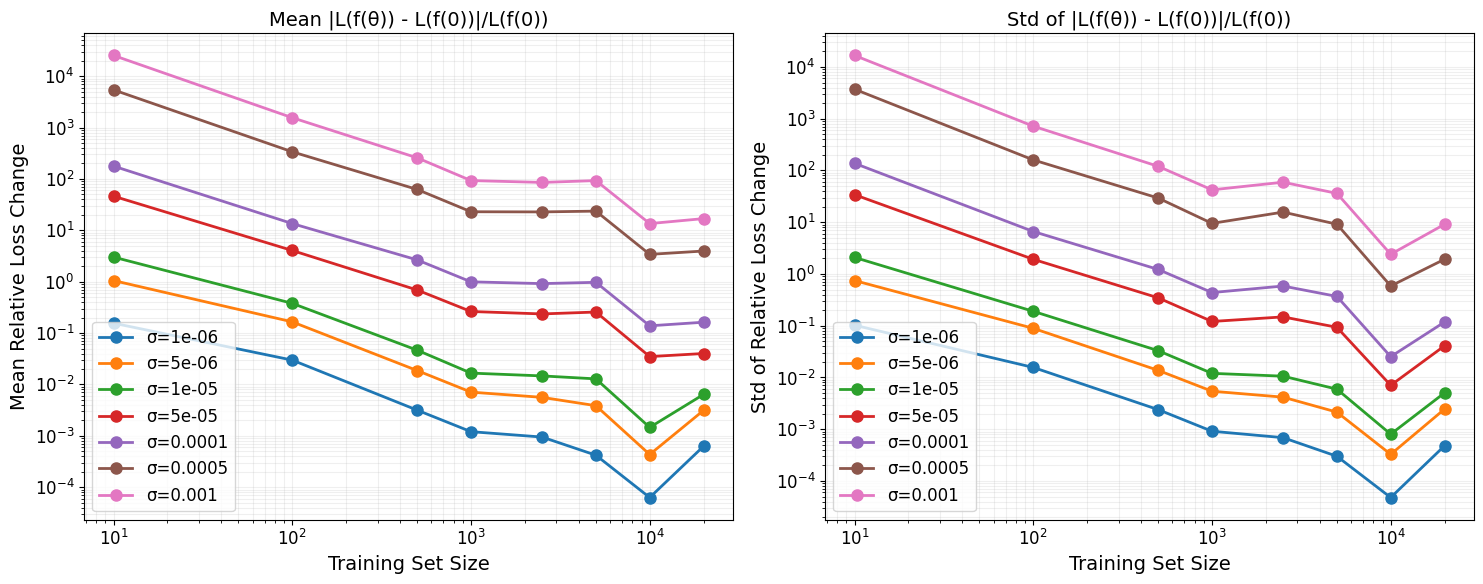


Numerical Values:

n_train  sigma  mean_rel_change  std_rel_change  base_loss
-----------------------------------------------------------------
     10  0.00000  0.155773  0.102403  0.000000
     10  0.00001  1.052063  0.745756  0.000000
     10  0.00001  3.012002  2.087498  0.000000
     10  0.00005  46.187962  34.036052  0.000000
     10  0.00010  177.733651  137.369420  0.000000
     10  0.00050  5418.265005  3712.030983  0.000000
     10  0.00100  25360.559580  16670.050871  0.000000
    100  0.00000  0.029739  0.015628  0.000000
    100  0.00001  0.165186  0.088996  0.000000
    100  0.00001  0.378577  0.189755  0.000000
    100  0.00005  4.047870  1.919517  0.000000
    100  0.00010  13.524479  6.608722  0.000000
    100  0.00050  337.415835  159.742583  0.000000
    100  0.00100  1555.983896  717.114987  0.000000
    500  0.00000  0.003159  0.002393  0.000002
    500  0.00001  0.018636  0.013727  0.000002
    500  0.00001  0.046439  0.032939  0.000002
    500  0.00005  0.688693

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
from typing import Dict, List
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from typing import List, Set, Tuple
import random

class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int, depth: int, mode: str = 'special', gamma: float = 1.0):
        super().__init__()
        self.gamma = gamma
        # ... rest of initialization code stays the same ...

        
        torch.set_default_dtype(torch.float32)
        
        self.mode = mode
        self.depth = depth
        self.hidden_size = hidden_size
        self.input_dim = d
        
        layers = []
        prev_dim = d
        self.layer_lrs = []  # Store layerwise learning rates
        
        for layer_idx in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            
            if mode == 'special':
                # Special initialization as in original code
                gain = nn.init.calculate_gain('relu')
                std = gain / np.sqrt(prev_dim)
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
                
            elif mode == 'spectral':
                # Implement spectral initialization
                fan_in = prev_dim
                fan_out = hidden_size
                std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(float(fan_out) / fan_in)
                
            elif mode == 'mup_pennington':
                # muP initialization and learning rates from the paper
                if layer_idx == 0:  # Embedding layer
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0  # O(1) learning rate for embedding
                else:  # Hidden layers
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for hidden
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(lr_scale)
                
            else:  # standard
                nn.init.xavier_uniform_(linear.weight)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
            
            layers.extend([
                linear,
                nn.ReLU()
            ])
            prev_dim = hidden_size
        
        # Final layer
        final_layer = nn.Linear(prev_dim, 1)
        if mode == 'special':
            nn.init.normal_(final_layer.weight, std=0.01)
            self.layer_lrs.append(1.0)
        elif mode == 'spectral':
            fan_in = prev_dim
            fan_out = 1
            std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(float(fan_out) / fan_in)
        elif mode == 'mup_pennington':
            std = 1.0 / np.sqrt(prev_dim)
            lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for readout
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(lr_scale)
        else:
            nn.init.xavier_uniform_(final_layer.weight)
            self.layer_lrs.append(1.0)
            
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gamma = float(self.gamma)  # Ensure gamma is a float
        return self.network(x).squeeze() / gamma
    
    def get_layer_learning_rates(self, base_lr: float) -> List[float]:
        """Return list of learning rates for each layer"""
        return [base_lr * lr for lr in self.layer_lrs]

def extract_n_train(path: str) -> int:
    """Extract n_train from path"""
    match = re.search(r'_n(\d+)_', path)
    if match:
        return int(match.group(1))
    raise ValueError(f"Could not extract n_train from path: {path}")

def load_model_and_evaluate(model_path: str, data_path: str, hidden_size: int, depth: int) -> float:
    """Load original model and calculate its loss on training data"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Load model
    state_dict = torch.load(model_path, map_location=device, weights_only=True)
    model = DeepNN(d=30, hidden_size=hidden_size, depth=depth, mode='mup_pennington').to(device)
    model.load_state_dict(state_dict)
    
    # Load data
    data_dict = torch.load(data_path, map_location=device)
    X = data_dict['X'].to(device)
    y = data_dict['y'].to(device)
    
    # Calculate loss
    with torch.no_grad():
        pred = model(X)
        loss = torch.mean((pred - y) ** 2).item()
    
    return loss

# Model and data paths


model_paths = [
        "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n10_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n100_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n500_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n1000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n2500_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n5000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n10000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/final_model_h1000_d4_n20000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt"
    ]
    
    # Data paths
data_paths = [
       "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n10_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n100_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n500_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n1000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n2500_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n5000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n10000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_anthro_true_mup_lr0005_gamma_1_modelsaved/train_dataset_h1000_d4_n20000_lr0.005_g1.0_mup_pennington_shuffled_20250125_153042_rank0.pt"
    ]


# Load the results with perturbations
with open('/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_true_h1000_d4_g1_small/stability_results_final_20250129_011054.json', 'r') as f:
    results = json.load(f)

# Process results with true base loss
processed_data = {}

# Create path mapping
path_mapping = {}
for model_path, data_path in zip(model_paths, data_paths):
    n_train = extract_n_train(model_path)
    path_mapping[n_train] = (model_path, data_path)

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        # Get base loss from original model
        model_path, data_path = path_mapping[n_train]
        print(f"Computing base loss for n_train={n_train}")
        base_loss = load_model_and_evaluate(model_path, data_path, hidden_size=1000, depth=4)
        processed_data[n_train] = {
            'base_loss': base_loss,
            'perturbations': {}
        }
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]['perturbations']:
            # Calculate relative changes using true base loss
            base_loss = processed_data[n_train]['base_loss']
            relative_changes = [abs(loss - base_loss)/base_loss for loss in losses]
            processed_data[n_train]['perturbations'][sigma] = {
                'mean': np.mean(relative_changes),
                'std': np.std(relative_changes)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]]['perturbations'].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas = ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']  # Change these values as needed

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means of relative changes
for sigma in selected_sigmas:
    means = [processed_data[n]['perturbations'][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Relative Loss Change')
ax1.set_title('Mean |L(f(θ)) - L(f(0))|/L(f(0))')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations of relative changes
for sigma in selected_sigmas:
    stds = [processed_data[n]['perturbations'][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Std of Relative Loss Change')
ax2.set_title('Std of |L(f(θ)) - L(f(0))|/L(f(0))')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_rel_change  std_rel_change  base_loss")
print("-" * 65)
for n in sorted(n_trains):
    for sigma in selected_sigmas:
        mean = processed_data[n]['perturbations'][sigma]['mean']
        std = processed_data[n]['perturbations'][sigma]['std']
        base = processed_data[n]['base_loss']
        print(f"{n:7d}  {float(sigma):.5f}  {mean:.6f}  {std:.6f}  {base:.6f}")

In [ ]:
########

Computing base loss for n_train=10
Computing base loss for n_train=100


/tmp/ipykernel_1222364/3416303299.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(data_path, map_location=device)


Computing base loss for n_train=500
Computing base loss for n_train=1000
Computing base loss for n_train=2500
Computing base loss for n_train=5000
Computing base loss for n_train=10000
Computing base loss for n_train=20000
Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001']


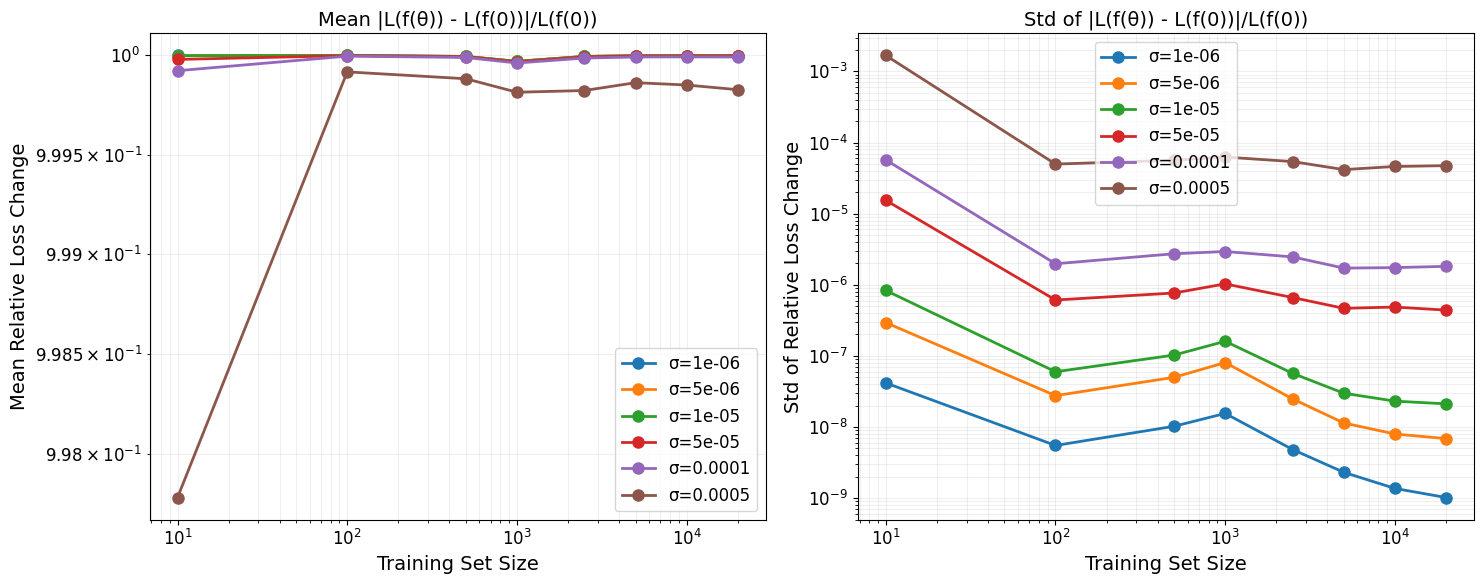


Numerical Values:

n_train  sigma  mean_rel_change  std_rel_change  base_loss
-----------------------------------------------------------------
     10  0.00000  1.000000  0.000000  0.070845
     10  0.00001  0.999999  0.000000  0.070845
     10  0.00001  0.999998  0.000001  0.070845
     10  0.00005  0.999980  0.000015  0.070845
     10  0.00010  0.999923  0.000057  0.070845
     10  0.00050  0.997779  0.001679  0.070845
    100  0.00000  1.000000  0.000000  1.303942
    100  0.00001  1.000000  0.000000  1.303942
    100  0.00001  1.000000  0.000000  1.303942
    100  0.00005  0.999999  0.000001  1.303942
    100  0.00010  0.999996  0.000002  1.303942
    100  0.00050  0.999917  0.000050  1.303942
    500  0.00000  0.999995  0.000000  0.725880
    500  0.00001  0.999995  0.000000  0.725880
    500  0.00001  0.999994  0.000000  0.725880
    500  0.00005  0.999993  0.000001  0.725880
    500  0.00010  0.999989  0.000003  0.725880
    500  0.00050  0.999883  0.000056  0.725880
   1000  

Computing base loss for n_train=10
Computing base loss for n_train=100


/tmp/ipykernel_1222364/2370823754.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(data_path, map_location=device)


Computing base loss for n_train=500
Computing base loss for n_train=1000
Computing base loss for n_train=2500
Computing base loss for n_train=5000
Computing base loss for n_train=10000
Computing base loss for n_train=20000
Computing base loss for n_train=40000
Available sigmas: ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001', '0.005', '0.01', '0.1']


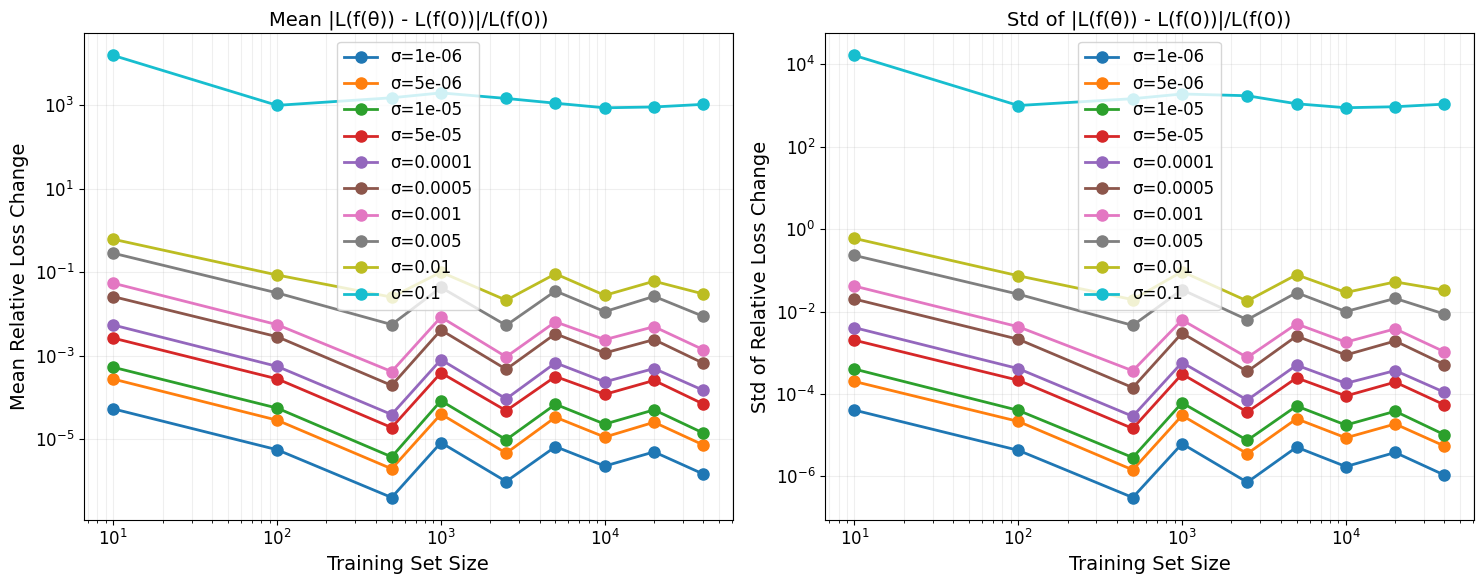


Numerical Values:

n_train  sigma  mean_rel_change  std_rel_change  base_loss
-----------------------------------------------------------------
     10  0.000001  0.000053  0.000041  0.070845
     10  0.000005  0.000276  0.000201  0.070845
     10  0.000010  0.000529  0.000402  0.070845
     10  0.000050  0.002643  0.002015  0.070845
     10  0.000100  0.005441  0.004064  0.070845
     10  0.000500  0.026037  0.020047  0.070845
     10  0.001000  0.054581  0.041380  0.070845
     10  0.005000  0.285229  0.229486  0.070845
     10  0.010000  0.616379  0.593545  0.070845
     10  0.100000  15582.661576  16263.927511  0.070845
    100  0.000001  0.000006  0.000004  1.303942
    100  0.000005  0.000029  0.000022  1.303942
    100  0.000010  0.000056  0.000040  1.303942
    100  0.000050  0.000280  0.000215  1.303942
    100  0.000100  0.000557  0.000413  1.303942
    100  0.000500  0.002859  0.002127  1.303942
    100  0.001000  0.005553  0.004271  1.303942
    100  0.005000  0.031987  0.

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
from typing import Dict, List
import torch.nn as nn

class DeepNN(nn.Module):
    def __init__(self, input_dim: int, hidden_size: int, depth: int, mode: str = 'special', gamma: float = 1.0):
        super().__init__()
        self.gamma = gamma
        torch.set_default_dtype(torch.float32)
        
        self.mode = mode
        self.depth = depth
        self.hidden_size = hidden_size
        self.input_dim = input_dim
        
        layers = []
        prev_dim = input_dim
        self.layer_lrs = []  # Store layerwise learning rates
        
        for layer_idx in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            
            if mode == 'special':
                gain = nn.init.calculate_gain('relu')
                std = gain / np.sqrt(prev_dim)
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
                
            elif mode == 'spectral':
                fan_in = prev_dim
                fan_out = hidden_size
                std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(float(fan_out) / fan_in)
                
            elif mode == 'mup_pennington':
                if layer_idx == 0:  # Embedding layer
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0  # O(1) learning rate for embedding
                else:  # Hidden layers
                    std = 1.0 / np.sqrt(prev_dim)
                    lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for hidden
                nn.init.normal_(linear.weight, mean=0.0, std=std)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(lr_scale)
                
            else:  # standard
                nn.init.xavier_uniform_(linear.weight)
                nn.init.zeros_(linear.bias)
                self.layer_lrs.append(1.0)
            
            layers.extend([
                linear,
                nn.ReLU()
            ])
            prev_dim = hidden_size
        
        # Final layer
        final_layer = nn.Linear(prev_dim, 1)
        if mode == 'special':
            nn.init.normal_(final_layer.weight, std=0.01)
            self.layer_lrs.append(1.0)
        elif mode == 'spectral':
            fan_in = prev_dim
            fan_out = 1
            std = (1.0 / np.sqrt(fan_in)) * min(1.0, np.sqrt(fan_out / fan_in))
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(float(fan_out) / fan_in)
        elif mode == 'mup_pennington':
            std = 1.0 / np.sqrt(prev_dim)
            lr_scale = 1.0 / prev_dim  # O(1/n) learning rate for readout
            nn.init.normal_(final_layer.weight, std=std)
            self.layer_lrs.append(lr_scale)
        else:
            nn.init.xavier_uniform_(final_layer.weight)
            self.layer_lrs.append(1.0)
            
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gamma = float(self.gamma)  # Ensure gamma is a float
        return self.network(x).squeeze() / gamma
    
    def get_layer_learning_rates(self, base_lr: float) -> List[float]:
        """Return list of learning rates for each layer"""
        return [base_lr * lr for lr in self.layer_lrs]

def extract_n_train(path: str) -> int:
    """Extract n_train from path"""
    match = re.search(r'_n(\d+)_', path)
    if match:
        return int(match.group(1))
    raise ValueError(f"Could not extract n_train from path: {path}")

def load_model_and_evaluate(model_path: str, data_path: str, hidden_size: int, depth: int) -> float:
    """Load original model and calculate its loss on training data"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Load model
    state_dict = torch.load(model_path, map_location=device, weights_only=True)
    model = DeepNN(input_dim=20, hidden_size=hidden_size, depth=depth, mode='mup_pennington').to(device)  # Changed parameter name from d to input_dim
    model.load_state_dict(state_dict)
    
    # Load data
    data_dict = torch.load(data_path, map_location=device)
    X = data_dict['X'].to(device)
    y = data_dict['y'].to(device)
    
    # Calculate loss
    with torch.no_grad():
        pred = model(X)
        loss = torch.mean((pred - y) ** 2).item()
    
    return loss

# [Rest of the script remains the same...]

# Model and data paths should be filled in here
model_paths = [
       "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n10_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n100_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n500_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n1000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n2500_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n5000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n10000_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n20000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/initial_model_h1000_d4_n40000_lr0.001_mup_pennington_20250128_001331_rank0.pt"
    ]
    
    # Data paths
data_paths = [
       "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n10_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n100_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n500_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n1000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n2500_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n5000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n10000_lr0.001_mup_pennington_20250128_001331_rank0.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n20000_lr0.001_mup_pennington_20250128_001331_rank1.pt",
"/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_prune_2801_false/dataset_h1000_d4_n40000_lr0.001_mup_pennington_20250128_001331_rank0.pt"
    ]

# Load the results with perturbations - update this path as needed
results_path = '/mnt/users/goringn/NNs_vs_Kernels/results/stability_test_pp_false_h1000_d4_g1_all1/stability_results_final_20250129_014749.json'  # Path to your stability results json
with open(results_path, 'r') as f:
    results = json.load(f)

# Process results with true base loss
processed_data = {}

# Create path mapping
path_mapping = {}
for model_path, data_path in zip(model_paths, data_paths):
    n_train = extract_n_train(model_path)
    path_mapping[n_train] = (model_path, data_path)

for result in results:
    n_train = result['n_train']
    if n_train not in processed_data:
        # Get base loss from original model
        model_path, data_path = path_mapping[n_train]
        print(f"Computing base loss for n_train={n_train}")
        base_loss = load_model_and_evaluate(model_path, data_path, hidden_size=1000, depth=4)
        processed_data[n_train] = {
            'base_loss': base_loss,
            'perturbations': {}
        }
    
    for sigma, losses in result['perturbations'].items():
        if sigma not in processed_data[n_train]['perturbations']:
            # Calculate relative changes using true base loss
            base_loss = processed_data[n_train]['base_loss']
            relative_changes = [abs(loss - base_loss)/base_loss for loss in losses]
            processed_data[n_train]['perturbations'][sigma] = {
                'mean': np.mean(relative_changes),
                'std': np.std(relative_changes)
            }

# Sort n_train values for plotting
n_trains = sorted(processed_data.keys())
all_sigmas = sorted(list(processed_data[n_trains[0]]['perturbations'].keys()), key=float)
print("Available sigmas:", all_sigmas)

# Select which sigmas to plot
selected_sigmas = ['1e-06', '5e-06', '1e-05', '5e-05', '0.0001', '0.0005', '0.001', '0.005', '0.01', '0.1']

# Set plotting style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means of relative changes
for sigma in selected_sigmas:
    means = [processed_data[n]['perturbations'][sigma]['mean'] for n in n_trains]
    ax1.loglog(n_trains, means, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Mean Relative Loss Change')
ax1.set_title('Mean |L(f(θ)) - L(f(0))|/L(f(0))')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Plot standard deviations of relative changes
for sigma in selected_sigmas:
    stds = [processed_data[n]['perturbations'][sigma]['std'] for n in n_trains]
    ax2.loglog(n_trains, stds, 'o-', label=f'σ={sigma}', markersize=8, linewidth=2)

ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Std of Relative Loss Change')
ax2.set_title('Std of |L(f(θ)) - L(f(0))|/L(f(0))')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print numerical values for selected sigmas
print("\nNumerical Values:")
print("\nn_train  sigma  mean_rel_change  std_rel_change  base_loss")
print("-" * 65)
for n in sorted(n_trains):
    for sigma in selected_sigmas:
        mean = processed_data[n]['perturbations'][sigma]['mean']
        std = processed_data[n]['perturbations'][sigma]['std']
        base = processed_data[n]['base_loss']
        print(f"{n:7d}  {float(sigma):.6f}  {mean:.6f}  {std:.6f}  {base:.6f}")